## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,string

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## Data

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [ ]:
data.shape

(20968, 8)

In [ ]:
data['TITLE'].unique()

array(['Reconstructing Subject-Specific Effect Maps',
       'Rotation Invariance Neural Network',
       'Spherical polyharmonics and Poisson kernels for polyharmonic functions',
       ..., 'Analysing Soccer Games with Clustering and Conceptors',
       'On the Efficient Simulation of the Left-Tail of the Sum of Correlated Log-normal Variates',
       'Why optional stopping is a problem for Bayesians'], dtype=object)

In [ ]:
data.isnull().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

## Datapreprocessing

In [ ]:
data["Article"] = data[["TITLE", "ABSTRACT"]].apply("-".join, axis=1)
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Article
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps- ...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network- Rotation ...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,Contemporary machine learning: a guide for pra...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,Uniform diamond coatings on WC-Co hard alloy c...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,Analysing Soccer Games with Clustering and Con...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,On the Efficient Simulation of the Left-Tail o...


In [ ]:
df = data[{'Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance',	'Article'}]
df

,Quantitative Biology,Computer Science,Article,Statistics,Mathematics,Physics,Quantitative Finance
0,0,1,Reconstructing Subject-Specific Effect Maps- ...,0,0,0,0
1,0,1,Rotation Invariance Neural Network- Rotation ...,0,0,0,0
2,0,0,Spherical polyharmonics and Poisson kernels fo...,0,1,0,0
3,0,0,A finite element approximation for the stochas...,0,1,0,0
4,0,1,Comparative study of Discrete Wavelet Transfor...,1,0,0,0
...,...,...,...,...,...,...,...
20963,0,1,Contemporary machine learning: a guide for pra...,0,0,1,0
20964,0,0,Uniform diamond coatings on WC-Co hard alloy c...,0,0,1,0
20965,0,1,Analysing Soccer Games with Clustering and Con...,0,0,0,0
20966,0,0,On the Efficient Simulation of the Left-Tail o...,1,1,0,0


In [ ]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
from bs4 import BeautifulSoup

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
import re,string,unicodedata

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df['Article']=df['Article'].apply(denoise_text)

<ipython-input-44-a43b774b8e83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article']=df['Article'].apply(denoise_text)


In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
df['Article']=df['Article'].apply(remove_special_characters)

<ipython-input-46-33851fa8c9d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article']=df['Article'].apply(remove_special_characters)


In [ ]:
from nltk.corpus import stopwords


#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{'no', 'be', 'a', 'hasn', 'how', 'each', 'should', 'has', 'these', 'at', 'they', 'weren', 'does', 'further', "haven't", 'hers', 'too', 'ourselves', 'can', "needn't", 'himself', 'out', 'mightn', 'once', 'shouldn', 'that', 'were', "aren't", 'while', 'during', 'through', 'those', 'on', 'of', 'than', 'wasn', 'shan', 're', "won't", 'if', 'under', 'yourselves', "hadn't", 'isn', "it's", 'before', 'all', 'hadn', "you'd", 'themselves', "didn't", 'had', 'd', 'itself', 'few', 'am', 'haven', "should've", 'where', "couldn't", 'this', "don't", 'his', 'have', 'or', 'there', 'who', 'by', 'about', 'own', 'i', 'is', 'then', 'very', 'ours', 'nor', 'my', 'down', 'didn', "you'll", 'to', 'couldn', "wasn't", 'your', 'only', 'being', 'the', "mustn't", 'will', 'with', 'until', 'wouldn', 'when', 'was', "that'll", 'll', "wouldn't", 'ain', 'but', 'below', 'any', 'again', 'having', 'and', 'both', 'over', 'just', 'their', "doesn't", "isn't", 'her', "she's", 'do', 'she', 'him', 'doing', 'against', "hasn't", 'as', "m

In [ ]:
df['Article']=df['Article'].apply(remove_stopwords)

<ipython-input-48-008e6fae5e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article']=df['Article'].apply(remove_stopwords)


In [ ]:
#Lemmatizer example

def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))


df['Article'][0]

'Reconstructing SubjectSpecific Effect Maps Predictive models allow subjectspecific inference analyzing disease related alterations neuroimaging data Given subjects data inference made two levels global ie identifiying condition presence subject local ie detecting condition effect individual measurement extracted subjects data global inference widely used local inference used form subjectspecific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named RSM improve subjectspecific detections predictive modeling approaches particular binary classifiers RSM specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrappertype algorithm used different binary classifiers diagnostic manner ie without information condition presence Reconstruction posed MaximumAPosteriori problem prior model whose parameters estimated training data classi

## Word Cloud

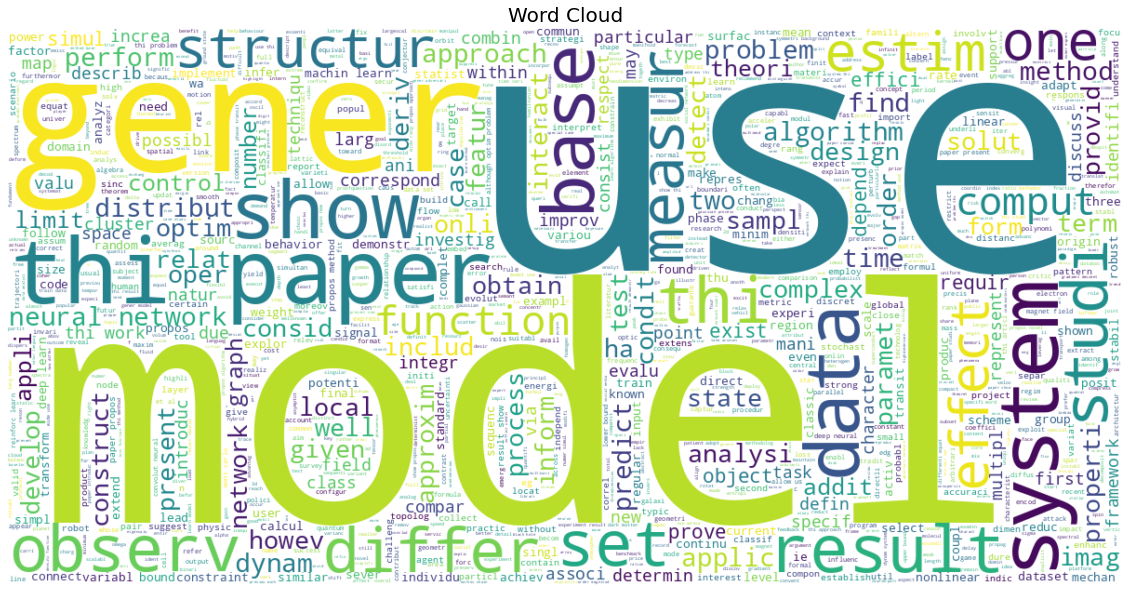

In [ ]:
#word cloud for positive reviews
from wordcloud import WordCloud,STOPWORDS
positive_data = df['Article']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud',fontsize = 20)
plt.show()

## TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform(df['Article'])
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))



With TFIDFVectorizer
['also' 'data' 'learning' 'method' 'model' 'paper' 'problem' 'results'
 'show' 'using']
[[0.1054951  0.87325487 0.         ... 0.10227118 0.19876065 0.30251804]
 [0.4814897  0.         0.59386302 ... 0.         0.         0.4602404 ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 ...
 [0.77897898 0.40300876 0.48039118 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.6436041  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]




In [ ]:
print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=nlp.Defaults.stop_words,max_features=15000)
X = vectorizer.fit_transform(df['Article'])
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
x= df['Article']
y=df.drop("Article", axis=1)
x.head

<bound method NDFrame.head of 0        Reconstructing SubjectSpecific Effect Maps Pre...
1        Rotation Invariance Neural Network Rotation in...
2        Spherical polyharmonics Poisson kernels polyha...
3        finite element approximation stochastic Maxwel...
4        Comparative study Discrete Wavelet Transforms ...
                               ...                        
20963    Contemporary machine learning guide practition...
20964    Uniform diamond coatings WCCo hard alloy cutti...
20965    Analysing Soccer Games Clustering Conceptors p...
20966    Efficient Simulation LeftTail Sum Correlated L...
20967    optional stopping problem Bayesians Recently o...
Name: Article, Length: 20968, dtype: object>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state = 56)

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=16500)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

#### Logistic regression

In [ ]:
import sklearn
lg = sklearn.linear_model.LogisticRegression()

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
model =  MultiOutputClassifier(lg)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 65.1%


#### XGBoosting

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
model =  MultiOutputClassifier(xgb)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 61.3%


#### SVM

In [ ]:
svm = sklearn.svm.SVC()

In [ ]:
model =  MultiOutputClassifier(svm)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 66.3%


## Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences = [review.split() for review in data['Article']]
model = Word2Vec(sentences, size=320, window=5, min_count=1, workers=32)
model.save('word2vec.model')

In [ ]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((320,))
    return np.mean(word_vectors, axis=0)

In [ ]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_train = np.array([sentence_vector(sentence, model) for sentence in df['Article']])
word2vec_test = np.array(y)

In [ ]:
word2vec_train

array([[ 0.12489117, -0.41271365,  0.28718907, ..., -0.26610518,
         0.45315123,  0.25723425],
       [ 0.24112521, -0.33516452, -0.09746316, ..., -0.07230001,
         0.59427845,  0.43543389],
       [ 0.08554105, -0.187068  , -0.19824062, ..., -0.38361821,
         0.44129327, -0.15157302],
       ...,
       [ 0.12717359, -0.40154326,  0.04977321, ..., -0.18686166,
         0.54171097,  0.25110307],
       [ 0.0415789 , -0.33398721, -0.03615759, ..., -0.19574173,
         0.2762233 ,  0.2632592 ],
       [-0.00065608, -0.09029742,  0.13297781, ..., -0.04230698,
         0.23317368,  0.21667336]])

In [ ]:
word2vec_test

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0]])

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(word2vec_train, word2vec_test, test_size=0.25, random_state=42)

#### Logistic regression

In [ ]:
lgw = sklearn.linear_model.LogisticRegression()

In [ ]:
lgw =  MultiOutputClassifier(lg)

In [ ]:
lgw.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, lgw.predict(x_test))*100))

Accuracy on test data: 61.5%


#### XGBoosting

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
model =  MultiOutputClassifier(xgb)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 62.8%


#### SVM

In [ ]:
svm = sklearn.svm.SVC()

In [ ]:
model =  MultiOutputClassifier(svm)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 63.8%


## Combining TFIDF & Word2Vec

In [ ]:
def combine_vectors(doc):
    tfidf_vec = vectorizer.transform([doc])
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

In [ ]:
combined_train = np.array([combine_vectors(doc) for doc in df['Article']])
combined_test = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(combined_train, combined_test, test_size=0.25, random_state=42)

#### Logistic regression

In [ ]:
lgc = sklearn.linear_model.LogisticRegression()

In [ ]:
lgc =  MultiOutputClassifier(lgc)

In [ ]:
lgc.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, lgc.predict(x_test))*100))

Accuracy on test data: 61.5%


#### XGBoosting

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
model =  MultiOutputClassifier(xgb)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 62.8%


#### SVM

In [ ]:
svm = sklearn.svm.SVC()

In [ ]:
model =  MultiOutputClassifier(svm)

In [ ]:
model.fit(x_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(x_test))*100))

Accuracy on test data: 63.5%
